In [3]:
# Importing essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Defineing a dataset with financial metrics and values
data = {
    'Metric': [
        'Revenue', 'COGS', 'Gross Profit', 'Operating Expenses',
        'R&D Expenses', 'Marketing Expenses', 'Sales Expenses',
        'General & Administrative Expenses', 'Net Income',
        'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
        'Net Change in Cash', 'Gross Profit Margin', 'Debt-to-Equity Ratio',
        'Current Ratio', 'Return on Assets', 'Customer Acquisition Cost',
        'Customer Lifetime Value', 'Average Revenue Per User', 'Total Assets',
        'Total Liabilities', 'Equity', 'Accounts Receivable', 'Accounts Payable',
        'Inventory'
    ],
    'Value': [
        10, 6, 4, 2, 1.5, 0.5, 0.2, 0.3, 0.5, 10*0.3, -2, 5, 3,
        (10-6)/10, 0.8, 1.5, 0.1, 1000, 5000, 100, 20, 10, 8, 5, 4, 3 # Removed extra values here to match length of 'Metric'
    ]
}

# Converting the dataset into a pandas DataFrame
df = pd.DataFrame(data)

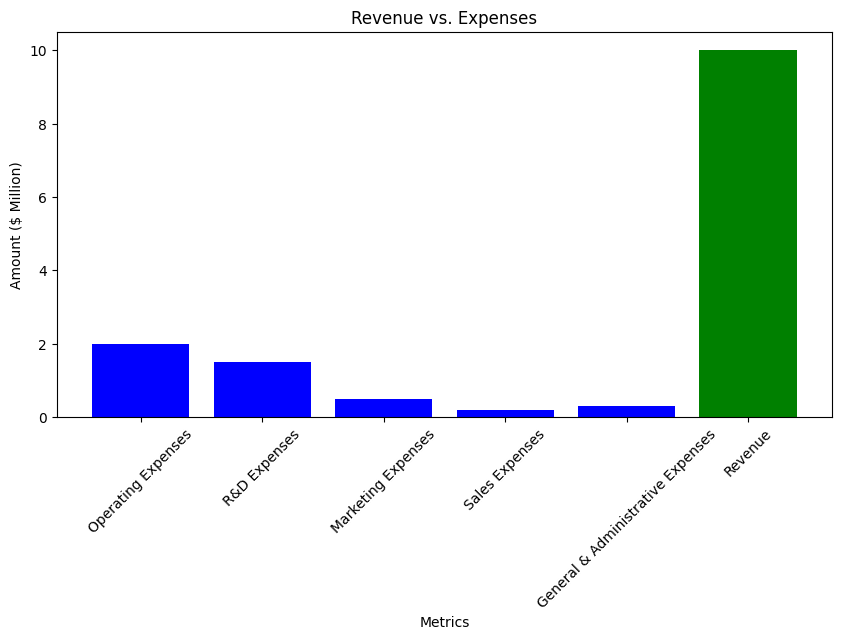

In [7]:
# Plottting revenue compared to various expenses
plt.figure(figsize=(10, 5))
expenses = [
    'Operating Expenses', 'R&D Expenses', 'Marketing Expenses',
    'Sales Expenses', 'General & Administrative Expenses'
]
values = [df.loc[df['Metric'] == expense, 'Value'].values[0] for expense in expenses]
revenue = df.loc[df['Metric'] == 'Revenue', 'Value'].values[0]
plt.bar(expenses + ['Revenue'], values + [revenue], color=['blue']*len(expenses) + ['green'])
plt.title('Revenue vs. Expenses')
plt.xlabel('Metrics')
plt.ylabel('Amount ($ Million)')
plt.xticks(rotation=45)
plt.show()

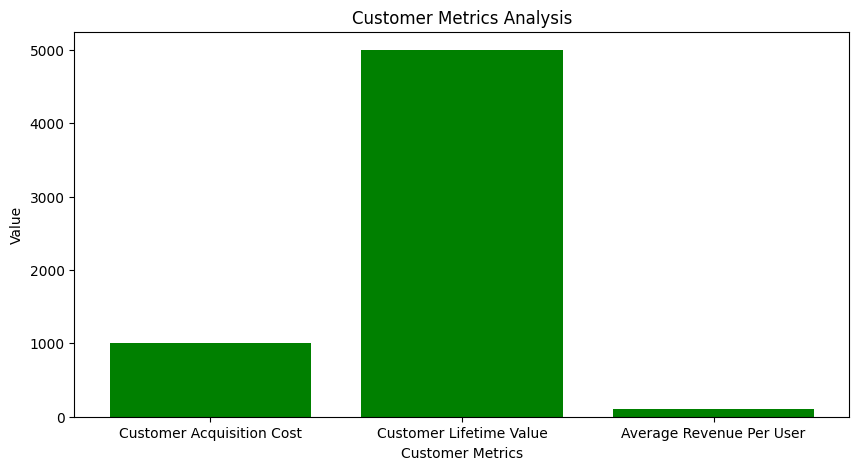

In [8]:
# Visualizing key customer metrics
customer_metrics = ['Customer Acquisition Cost', 'Customer Lifetime Value', 'Average Revenue Per User']
plt.figure(figsize=(10, 5))
customer_values = [df.loc[df['Metric'] == metric, 'Value'].values[0] for metric in customer_metrics]
plt.bar(customer_metrics, customer_values, color='green')
plt.title('Customer Metrics Analysis')
plt.xlabel('Customer Metrics')
plt.ylabel('Value')
plt.show()

In [9]:
# Calculating and display the Debt-to-Equity Ratio
debt_to_equity = df.loc[df['Metric'] == 'Debt-to-Equity Ratio', 'Value'].values[0]
equity = df.loc[df['Metric'] == 'Equity', 'Value'].values[0]
total_liabilities = df.loc[df['Metric'] == 'Total Liabilities', 'Value'].values[0]
debt_to_equity_calculated = total_liabilities / equity
print(f"Debt-to-Equity Ratio: {debt_to_equity_calculated:.2f} (Reported: {debt_to_equity})")

Debt-to-Equity Ratio: 1.25 (Reported: 0.8)


In [10]:
# Calculate and display the Current Ratio
current_assets = df.loc[df['Metric'] == 'Accounts Receivable', 'Value'].values[0] + df.loc[df['Metric'] == 'Inventory', 'Value'].values[0]
current_liabilities = df.loc[df['Metric'] == 'Accounts Payable', 'Value'].values[0]
current_ratio_calculated = current_assets / current_liabilities
print(f"Current Ratio: {current_ratio_calculated:.2f} (Reported: {df.loc[df['Metric'] == 'Current Ratio', 'Value'].values[0]})")

Current Ratio: 2.00 (Reported: 1.5)


In [13]:
# Sample data for quarterly performance
historical_data = {
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Revenue': [8, 9, 9.5, 10],
    'Net Income': [0.4, 0.45, 0.47, 0.5]
}
historical_df = pd.DataFrame(historical_data)

# Calculating percentage change quarter-over-quarter
historical_df['Revenue Change (%)'] = historical_df['Revenue'].pct_change() * 100
historical_df['Net Income Change (%)'] = historical_df['Net Income'].pct_change() * 100
print("\nQuarterly Changes in Revenue and Net Income:")
print(historical_df)


Quarterly Changes in Revenue and Net Income:
  Quarter  Revenue  Net Income  Revenue Change (%)  Net Income Change (%)
0      Q1      8.0        0.40                 NaN                    NaN
1      Q2      9.0        0.45           12.500000              12.500000
2      Q3      9.5        0.47            5.555556               4.444444
3      Q4     10.0        0.50            5.263158               6.382979


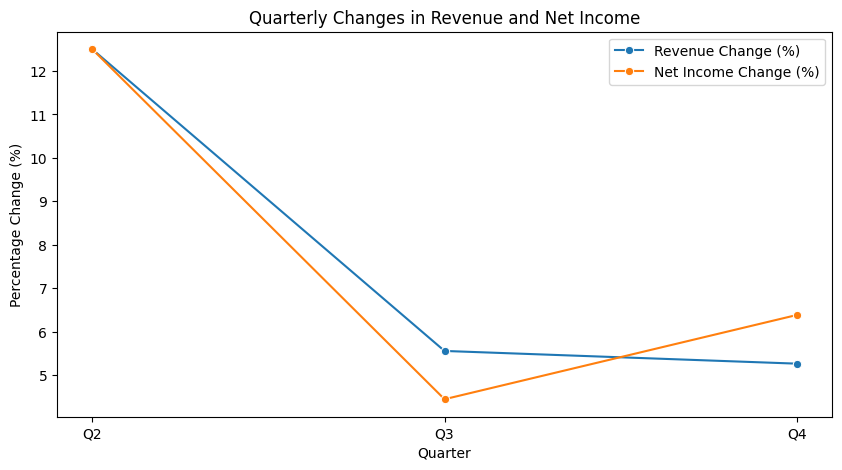

In [14]:
# Plotting quarterly changes in Revenue and Net Income
plt.figure(figsize=(10, 5))
sns.lineplot(data=historical_df, x='Quarter', y='Revenue Change (%)', marker='o', label='Revenue Change (%)')
sns.lineplot(data=historical_df, x='Quarter', y='Net Income Change (%)', marker='o', label='Net Income Change (%)')
plt.title('Quarterly Changes in Revenue and Net Income')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
historical_df['Quarter Number'] = [1, 2, 3, 4]  # Assign numerical values to quarters
X = historical_df[['Quarter Number']]
y_revenue = historical_df['Revenue']
y_net_income = historical_df['Net Income']

# Fit linear regression model for Revenue
revenue_model = LinearRegression().fit(X, y_revenue)
revenue_pred = revenue_model.predict([[5]])  # Predict for next quarter

# Fit linear regression model for Net Income
net_income_model = LinearRegression().fit(X, y_net_income)
net_income_pred = net_income_model.predict([[5]])  # Predict for next quarter

print(f"Predicted Revenue for next quarter: {revenue_pred[0]:.2f}")
print(f"Predicted Net Income for next quarter: {net_income_pred[0]:.2f}")

Predicted Revenue for next quarter: 10.75
Predicted Net Income for next quarter: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Calculate moving average for Revenue and Net Income
historical_df['Revenue MA'] = historical_df['Revenue'].rolling(window=2).mean()
historical_df['Net Income MA'] = historical_df['Net Income'].rolling(window=2).mean()

print("\nHistorical Data with Moving Averages:")
print(historical_df[['Quarter', 'Revenue', 'Revenue MA', 'Net Income', 'Net Income MA']])


Historical Data with Moving Averages:
  Quarter  Revenue  Revenue MA  Net Income  Net Income MA
0      Q1      8.0         NaN        0.40            NaN
1      Q2      9.0        8.50        0.45          0.425
2      Q3      9.5        9.25        0.47          0.460
3      Q4     10.0        9.75        0.50          0.485
